<a href="https://colab.research.google.com/github/apkmannava/machine_learning_apk/blob/main/P1_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation, digits

import random
import sys

print(sys.version_info[0])
if sys.version_info[0]<3:
    PYTHON3 = False
else:
    PYTHON3 = True


3


# load data to visualize

In [ ]:
# upload data in this location first create folder "sentiment_Analysis" in side sample_data folder
data_path = '/content/sample_data/' 
df = pd.read_csv(data_path +'reviews_train.tsv' ,delimiter='\t', encoding='latin-1')
df

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,-1,B000EQYQBO,A2JZVE0Y19VLL0,blue chips,The chips are okay Not near as flavorful as th...,0,0
1,-1,B000LKVHYC,A3NAKOMAS0I5L9,Bad even for 'healthy',"I had high hopes for this, but it was bad. Re...",0,0
2,-1,B003QRQRY2,ARBO3XW14MNGA,Alot of money for one can,I guess it's only one can since there is nothi...,1,1
3,-1,B008EG58V8,A1IQXGT4MJUYJ8,"The Box says ""OATMEAL SQUARES"" which I believe...","""Oatmeal Squares"" is in about the largest prin...",0,0
4,1,B004WZZY8M,A2TBL6WAZGXB9P,Delicious!,"I really enjoyed this flavor, this has a very ...",1,0
...,...,...,...,...,...,...,...
3995,-1,B0038B1DEU,A3MKRM2Q9F04UH,Great nutrititious drink for kids,I bought both the Berry and Chocolate drinks f...,4,2
3996,1,B0002CDZD0,A1ESH5GWEGT2ZX,SOOO GOOD FOR THE SKIN,"THIS LAVENDER IS SOOO GOOD.IT LOOKS,SMELLS,TAS...",1,0
3997,1,B006N3I2SK,A2S0YE8GUSX20A,Deep fabulous rich decaf coffee for the Keurig,Great great decaf. Made the Keurig worth it. ...,1,0
3998,1,B004TPUSU4,A16J5HGMGX5LWM,EXCELLENT American-made GF pasta!,Cooks up al-dente with great flavor. Doesn't f...,0,0


# load data section

## load_data

In [ ]:
def load_data(path_data, extras = False):
    """
    Returns a list of dict with keys:
    * sentiment: +1 or -1 if the review was positive or negative, respectively
    * text: the text of the review

    Additionally, if the `extras` argument is True, each dict will also include the
    following information:
    * productId: a string that uniquely identifies each product
    * userId: a string that uniquely identifies each user
    * summary: the title of the review
    * helpfulY: the number of users who thought this review was helpful
    * helpfulN: the number of users who thought this review was NOT helpful
    """

    global PYTHON3 

    basic_fields = {'sentiment','text'}
    numeric_fields = {'sentiment', 'helpfulY','helfulN'}

    data =[]

    if PYTHON3:
        f_data = open(path_data, encoding='latin1')
    else:
        f_data = open(path_data)
    
    for datum in csv.DictReader(f_data,delimiter = '\t'):
        for field in list(datum.keys()):
            if not extras and field not in basic_fields:
                del datum[field]
            elif field in numeric_fields and datum[field]:
                datum[field] = int(datum[field])
        data.append(datum)
    
    f_data.close()
    
    return data


## get_order

In [ ]:
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

## load_toy_data

In [ ]:
def load_toy_data(path_toy_data):
    """
    Loads the 2D toy dataset as numpy arrays.
    Returns the tuple (features, labels) in which features is an Nx2 numpy matrix and
    labels is a length-N vector of +1/-1 labels.
    """
    labels, xs, ys = np.loadtxt(path_toy_data, delimiter='\t', unpack=True)
    return np.vstack((xs, ys)).T, labels

# helper_functions



## extract_words

In [ ]:
def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()

## bag_of_words

In [ ]:
def bag_of_words(texts,file_path):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by requirement
    """
    
    # file_path=str('/content/sample_data/stopwords.txt') ## first upload to colab
    remove_word_list=list()
    for word in open(file_path,'r'):
        remove_word_list.append(word.strip())
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in remove_word_list:
                if word not in dictionary:
                    dictionary[word] = len(dictionary)
    return dictionary

## most_explanatory_word

In [ ]:
def most_explanatory_word(theta, wordlist):
    """Returns the word associated with the bag-of-words feature having largest weight."""
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]

## extract_bow_feature_vectors

In [ ]:
def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.

    Feel free to change this code as guided by Problem 9
    """

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])
    
    for i, text in enumerate(reviews):
        word_list = extract_words(text)

        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] += 1
   
    return feature_matrix

## plot_toy_data

In [ ]:
def plot_toy_data(algo_name, features, labels, thetas):
    """
    Plots the toy data in 2D.
    Arguments:
    * features - an Nx2 ndarray of features (points)
    * labels - a length-N vector of +1/-1 labels
    * thetas - the tuple (theta, theta_0) that is the output of the learning algorithm
    * algorithm - the string name of the learning algorithm used
    """
    # plot the points with labels represented as colors
    plt.subplots()
    colors = ['b' if label == 1 else 'r' for label in labels]
    plt.scatter(features[:, 0], features[:, 1], s=40, c=colors)
    xmin, xmax = plt.axis()[:2]

    # plot the decision boundary
    theta, theta_0 = thetas
    xs = np.linspace(xmin, xmax)
    ys = -(theta[0]*xs + theta_0) / (theta[1] + 1e-16)
    plt.plot(xs, ys, 'k-')

    # show the plot
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    plt.suptitle('Classified Toy Data ({})'.format(algo_name))
    plt.show()

## plot_tune_results

In [ ]:
def plot_tune_results(algo_name, param_name, param_vals, acc_train, acc_val):
    """
    Plots classification accuracy on the training and validation data versus
    several values of a hyperparameter used during training.
    """
    # put the data on the plot
    plt.subplots()
    plt.plot(param_vals, acc_train, '-o')
    plt.plot(param_vals, acc_val, '-o')

    # make the plot presentable
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    param_name = param_name.capitalize()
    plt.suptitle('Classification Accuracy vs {} ({})'.format(param_name, algo_name))
    plt.legend(['train','val'], loc='upper right', title='Partition')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy (%)')
    plt.show()

# perceptron

## perceptron single step

In [ ]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    output=tuple()
    if (label*(np.matmul(feature_vector.transpose(),current_theta)+current_theta_0))<=0:
        current_theta=current_theta+(label*feature_vector)
        current_theta_0=current_theta_0+label
    output= (current_theta,current_theta_0)   
    return output

## perceptron T steps

In [ ]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    current_theta=np.zeros(len(feature_matrix[0]))
    current_theta_0=0
    a=tuple()
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
        # for i in range(feature_matrix.shape[0]):    
            feature_vector=feature_matrix[i]
            label=labels[i]
            a=perceptron_single_step_update(feature_vector,label,current_theta,current_theta_0)
            current_theta=a[0]
            current_theta_0=a[1]
            pass
    return a 

## average perceptron T steps

In [ ]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    current_theta=np.zeros(len(feature_matrix[0]))
    current_theta_avg=np.zeros(len(feature_matrix[0]))
    current_theta_0=0
    current_theta_0_avg=0
    n=len(labels)
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            feature_vector=feature_matrix[i]
            label=labels[i]
            output=perceptron_single_step_update(feature_vector,label,current_theta,current_theta_0)
            current_theta=output[0]
            current_theta_0=output[1]
            current_theta_avg+=output[0]
            current_theta_0_avg+=output[1]
            pass
       
    output=(current_theta_avg/(n*T),current_theta_0_avg/(n*T))
    return output 

#Peagasos

## pegasos single step

In [ ]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    output=tuple()
#    if (label*(np.dot(feature_vector,current_theta)))<=1:
    if (label*(np.dot(feature_vector,current_theta)+current_theta_0))<=1:
#        current_theta=current_theta+(label*feature_vector)
        
        current_theta=(
                        ((1-(eta*L))*current_theta)+
                        (eta*(label*feature_vector))
                      )
        current_theta_0=current_theta_0+(eta*label) 
    else:
        current_theta=(1-(eta*L))*current_theta

        
    output= (current_theta,current_theta_0)   
    return output    

## Pegasos T steps

In [ ]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    
    #..def pegasos(feature_matrix, labels, T, L).
    #.return_pegasos=> output= (current_theta,current_theta_0)
    """
    current_theta=np.zeros(len(feature_matrix[0]))
    current_theta_0=0 
    n=1
    for t in range(T):
            
        # for i in get_order(feature_matrix.shape[0]):
        for i in range(feature_matrix.shape[0]): 
            feature_vector=feature_matrix[i]
            label=labels[i]
            eta=1/(n**(1/2))
            output=pegasos_single_step_update(
                                                feature_vector,
                                                label,
                                                L,
                                                eta,
                                                current_theta,
                                                current_theta_0
                                              )
            current_theta=output[0]
            current_theta_0=output[1]
            n=n+1
            pass
    output= (current_theta,current_theta_0)
    return output

# classify

In [ ]:
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    output=list()
    for feture_data in feature_matrix:
        if(np.dot(feture_data,theta)+theta_0)>0:
            output.append(1)
        else:
             output.append(-1)
    output=np.array(output)
    return output

# classifier accuracy

In [ ]:
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    output_classifier=classifier(train_feature_matrix,train_labels,**kwargs)
    theta=output_classifier[0]
    theta_0=output_classifier[1]
    training_data_clasify_pred  =classify(train_feature_matrix, theta, theta_0)
    validation_data_clasify_pred=classify(  val_feature_matrix, theta, theta_0)
    a=accuracy(training_data_clasify_pred,train_labels)
    b=accuracy(validation_data_clasify_pred,val_labels)
    
    return (a,b)

def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

def classifier(train_feature_matrix, train_labels,**kwargs):

    if kwargs["T"] and kwargs["L"]:
        a=pegasos(train_feature_matrix, train_labels,**kwargs) 
    elif kwargs["T"]:
        a=perceptron(train_feature_matrix, train_labels,**kwargs)
 
    return a


## Tune T and L parameters

In [ ]:
def tune(train_fn, param_vals, train_feats, train_labels, val_feats, val_labels):
    train_accs = np.ndarray(len(param_vals)) #initialize a array
    val_accs = np.ndarray(len(param_vals))   #initialize a array

    for i, val in enumerate(param_vals):
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        train_preds = classify(train_feats, theta, theta_0)
        train_accs[i] = accuracy(train_preds, train_labels)

        val_preds = classify(val_feats, theta, theta_0)
        val_accs[i] = accuracy(val_preds, val_labels)

    return train_accs, val_accs

def tune_perceptron(*args):
    return tune(perceptron, *args)

def tune_avg_perceptron(*args):
    return tune(average_perceptron, *args)

def tune_pegasos_T(best_L, *args):
    def train_fn(features, labels, T):
        return pegasos(features, labels, T, best_L)
    return tune(train_fn, *args)

def tune_pegasos_L(best_T, *args):
    def train_fn(features, labels, L):
        return pegasos(features, labels, best_T, L)
    return tune(train_fn, *args)

# main_function

In [ ]:
data_path = '/content/sample_data/' 
train_data = load_data(data_path+'reviews_train.tsv')
val_data = load_data(data_path+'reviews_val.tsv')
test_data = load_data(data_path+'reviews_test.tsv')

'''

In Python, the asterisk (*) operator can be used in conjunction with the 
zip() function to unzip a list of tuples into separate lists. Here's an example:

# -- Zip two lists into a list of tuples
numbers = [1, 2, 3]
letters = ['A', 'B', 'C']
zipped = zip(numbers, letters)

# -- Unzip the list of tuples into separate lists
unzipped_numbers, unzipped_letters = zip(*zipped)

# -- Print the unzipped lists
print(list(unzipped_numbers))
print(list(unzipped_letters))

'''

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

In [ ]:
file_path = str(data_path+'stopwords.txt')
dictionary = bag_of_words(train_texts,file_path)

In [ ]:
train_bow_features = extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features =   extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features =  extract_bow_feature_vectors(test_texts, dictionary)

In [ ]:
toy_features, toy_labels = toy_data = load_toy_data(data_path+'toy_data.tsv')

In [ ]:
T = 10
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

## plot_toy_results

theta for Perceptron is 1.8809999999999982, 3.8159999999999963
theta_0 for Perceptron is -5.0


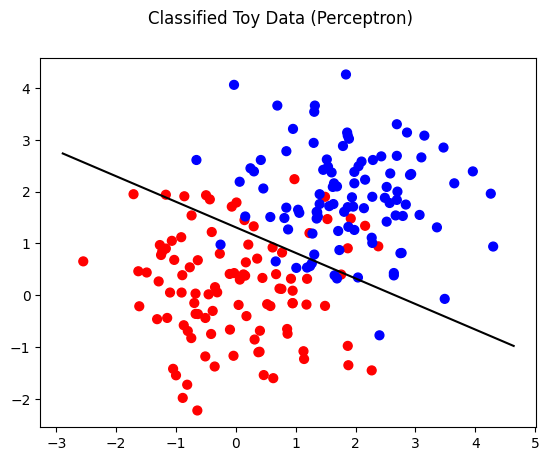

theta for Average Perceptron is 2.425476, 2.6097040000000176
theta_0 for Average Perceptron is -4.732


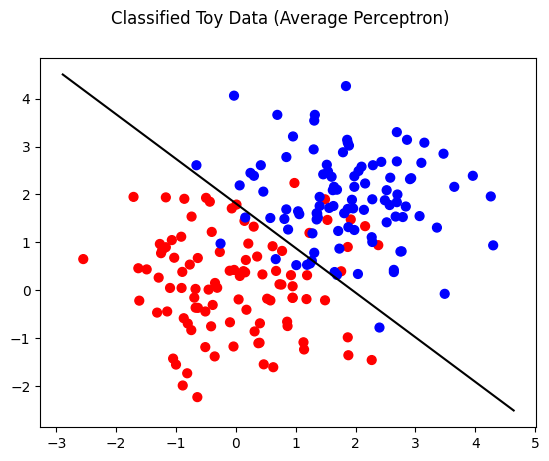

theta for Pegasos is 0.7536802421076947, 0.749209236441582
theta_0 for Pegasos is -0.6276783349436645


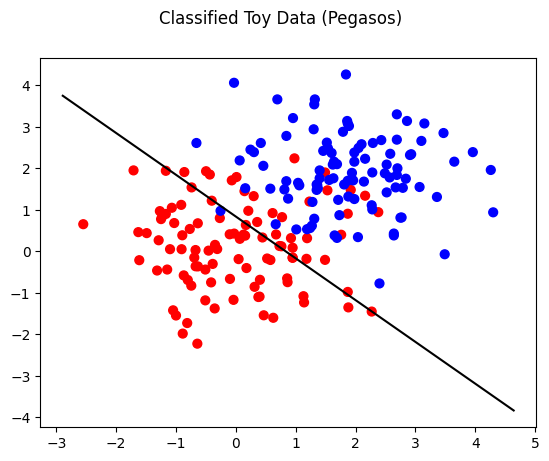

In [ ]:
def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)


## Baseline Accuracy

- validation accuracy of your Perceptron algorithm
- validation accuracy of your Average Perceptron algorithm
- validation accuracy of your Pegasos algorithm

In [ ]:
T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
   classifier_accuracy(perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print('\n------------------------------------------------------------------------------\n')
print("{:50} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))
print('\n------------------------------------------------------------------------------\n')
avg_pct_train_accuracy, avg_pct_val_accuracy = \
   classifier_accuracy(average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:50} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))
print('\n------------------------------------------------------------------------------\n')
avg_peg_train_accuracy, avg_peg_val_accuracy = \
   classifier_accuracy(pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))
print('\n------------------------------------------------------------------------------\n')


------------------------------------------------------------------------------

Training accuracy for perceptron:                  0.8948
Validation accuracy for perceptron:                0.7300

------------------------------------------------------------------------------

Training accuracy for average perceptron:          0.8832
Validation accuracy for average perceptron:        0.7320

------------------------------------------------------------------------------

Training accuracy for Pegasos:                     0.8103
Validation accuracy for Pegasos:                   0.7180

------------------------------------------------------------------------------



In [ ]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

 # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), 
                                       Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), 
                                       Ts[np.argmax(avg_pct_tune_results[1])]))

 # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), 
                                       Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
print('\n-------------\n')
print('fixed T; L value is:',fix_T,'\t',fix_L)
print('\n-------------\n')
peg_tune_results_L = tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), 
                                       Ls[np.argmax(peg_tune_results_L[1])]))

perceptron valid: [(1, 0.72), (5, 0.742), (10, 0.73), (15, 0.716), (25, 0.726), (50, 0.75)]
best = 0.7500, T=50.0000
avg perceptron valid: [(1, 0.654), (5, 0.72), (10, 0.732), (15, 0.752), (25, 0.762), (50, 0.768)]
best = 0.7680, T=50.0000
Pegasos valid: tune T [(1, 0.684), (5, 0.692), (10, 0.718), (15, 0.75), (25, 0.744), (50, 0.758)]
best = 0.7580, T=50.0000

-------------

fixed T; L value is: 50 	 0.01

-------------

Pegasos valid: tune L [(0.001, 0.776), (0.01, 0.758), (0.1, 0.662), (1, 0.528), (10, 0.482)]
best = 0.7760, L=0.0010


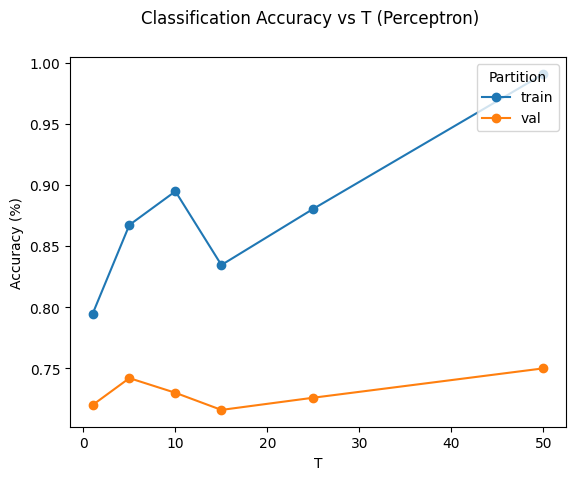

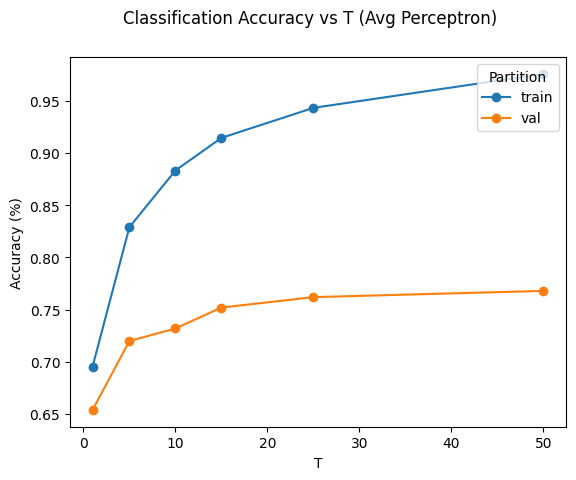

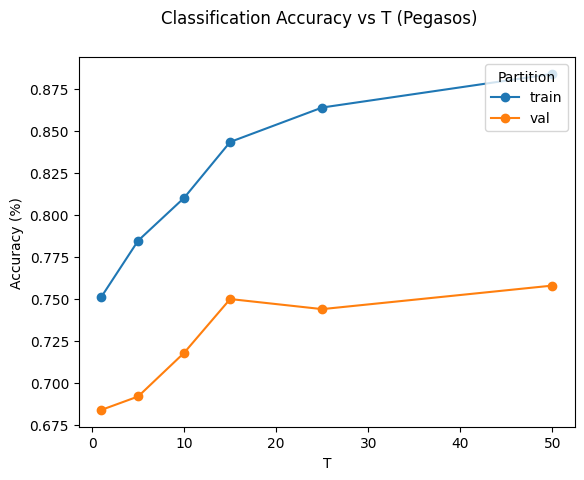

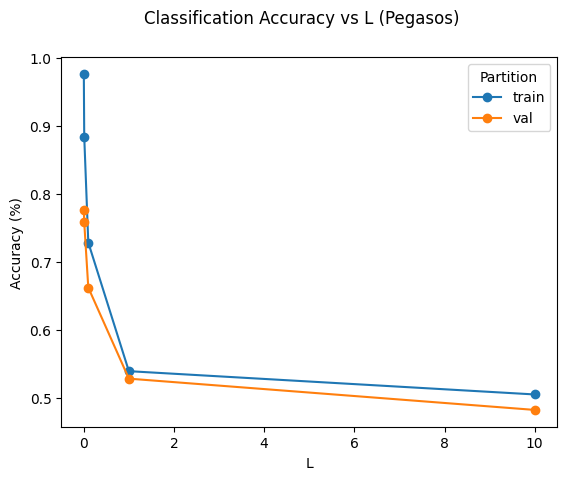

....pegasos....
Most Explanatory Word Features
['great', 'delicious', 'loves', 'perfect', 'best', 'favorite', 'excellent', 'tasty', 'wonderful', 'friends']


In [ ]:
plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

#-------------------------------------------------------------------------------
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.
#-------------------------------------------------------------------------------

accuracy_tuple=(np.max(pct_tune_results[1]),np.max(avg_pct_tune_results[1]),
                np.max(peg_tune_results_L[1]))

if max(accuracy_tuple)==accuracy_tuple[0]:
    thetas_bow_fetures=perceptron(train_bow_features,train_labels,fix_T)
    print('....perceptron....')
    
elif max(accuracy_tuple)==accuracy_tuple[1]:
    thetas_bow_fetures=average_perceptron(train_bow_features,train_labels,fix_T)    
    print('....avg_perceptron....')
    
elif max(accuracy_tuple)==accuracy_tuple[2]:
    thetas_bow_fetures=pegasos(train_bow_features,train_labels,fix_T,fix_L)
    print('....pegasos....')


test_bow_clasify=classify(test_bow_features, thetas_bow_fetures[0], thetas_bow_fetures[1])
test_bow_clasify_accuracy=accuracy(test_bow_clasify,test_labels)
#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------
best_theta = thetas_bow_fetures[0]
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])